In [1]:
! mkdir ~/.kaggle

In [2]:
! mv /content/kaggle.json ~/.kaggle

In [6]:
! kaggle datasets download -d santiviquez/hp1txt

  0% 0.00/162k [00:00<?, ?B/s]
100% 162k/162k [00:00<00:00, 85.7MB/s]


In [7]:
! unzip /content/hp1txt.zip
! rm /content/hp1txt.zip

Archive:  /content/hp1txt.zip
  inflating: hp1.txt                 


In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
file_path = '/content/hp1.txt'

In [11]:
with open(file_path, 'r') as file:
    lines = file.readlines()

In [12]:
corpus = lines

In [13]:
corpus_cleaned = []

In [16]:
for line in corpus :
  lower_case = line.lower()
  only_alphabets = re.sub(r'[^a-zA-Z\s]', '', lower_case)
  no_stopwords = [word for word in only_alphabets.split() if word not in stopwords.words('english')]
  clean_review = ' '.join(no_stopwords)
  corpus_cleaned.append(clean_review)

In [18]:
! pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199770 sha256=8bde2d6628a6db97840b3f1141470cd9bd3aff18b1a91c9d31373c65874bcfef
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [28]:
with open(file_path, 'w') as file:
  for line in corpus_cleaned :
    if line :
      file.write(line+'\n')

In [19]:
import fasttext

In [30]:
model = fasttext.train_unsupervised(file_path)

In [32]:
model.get_nearest_neighbors('good')

[(0.9999871850013733, 'forgotten'),
 (0.999987006187439, 'goodbye'),
 (0.9999865889549255, 'homework'),
 (0.9999862909317017, 'nicolas'),
 (0.9999858736991882, 'animals'),
 (0.9999857544898987, 'mysterious'),
 (0.9999856948852539, 'miserably'),
 (0.9999853372573853, 'excuse'),
 (0.9999853372573853, 'probably'),
 (0.9999852180480957, 'wonderful')]

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

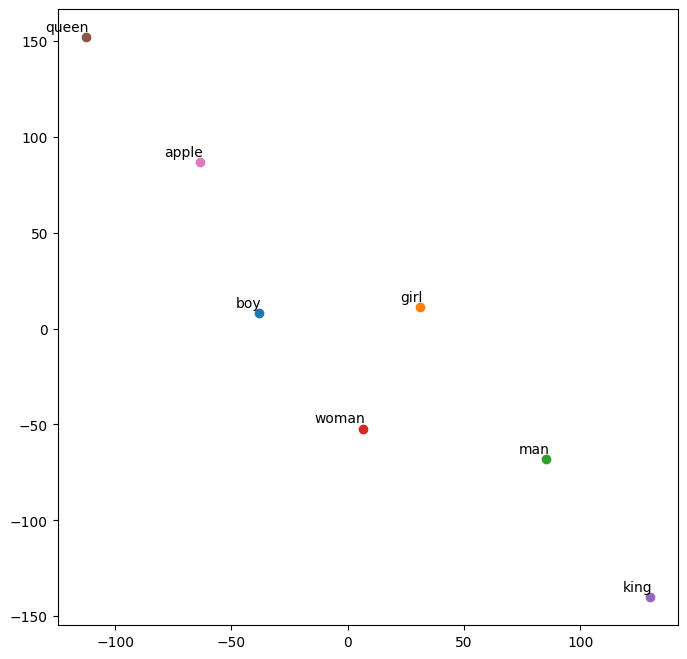

In [36]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "apple"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model.get_word_vector(word))
        labels.append(word)

    wordvecs = np.array(wordvecs)
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(8,8))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model)